## ASSIGNMENT - 4 (DECISION TREE ALGORITHM)
#### KRISHNA SAH TELI
#### GE22M018

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### LOADING DATASET

In [2]:
df= pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# Since columns names are not there, hence we add proper columns names
columns=['buying','maint','doors','persons','lug_boot','safety','decision']
df.columns= columns

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# Information about the shape of data
print("The total number of data entry is {} and data features is {}".format(df.shape[0],df.shape[1]))

The total number of data entry is 1727 and data features is 7


In [35]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### DATA CLEANING

In [5]:
# Searching for nan 

df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
decision    0
dtype: int64

It shows there is no nan values present in our dataset

however, we check it columns wise recorrect the some entry

##### For Buying attribute

In [8]:
df.buying.value_counts()

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

It is perfect, nothing to do with this. Good to go

##### For Maintenance attribute

In [9]:
df.maint.value_counts()

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

It is also good to go.

##### For Doors attribute

In [12]:
df.doors.value_counts()

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

In [8]:
#we will do little modification by replacing 5more with >=5

df.doors= df.doors.replace('5more', ">=5")

In [29]:
df.doors.value_counts()

3      432
4      432
>=5    432
2      431
Name: doors, dtype: int64

##### For Persons attribute

In [18]:
df.persons.value_counts()


4       576
more    576
2       575
Name: persons, dtype: int64

##### For lug_boot attribute

In [31]:
df.lug_boot.value_counts()

med      576
big      576
small    575
Name: lug_boot, dtype: int64

##### For Safety attribute

In [33]:
df.safety.value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

##### For Decision attribute

In [34]:
# It is our target class
df.decision.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

It shows whether one car is acceptable, uncceptable, good, or verygood

### DATA ANALYSIS

We will explore all the variables with respect to eachother to find out some insight which would be helpful to make our decision robust

In [11]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'decision'],
      dtype='object')

In [45]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


##### Relation between buying car with its dicision attribute

Text(0.5, 1.0, 'Impact of Price on Decision')

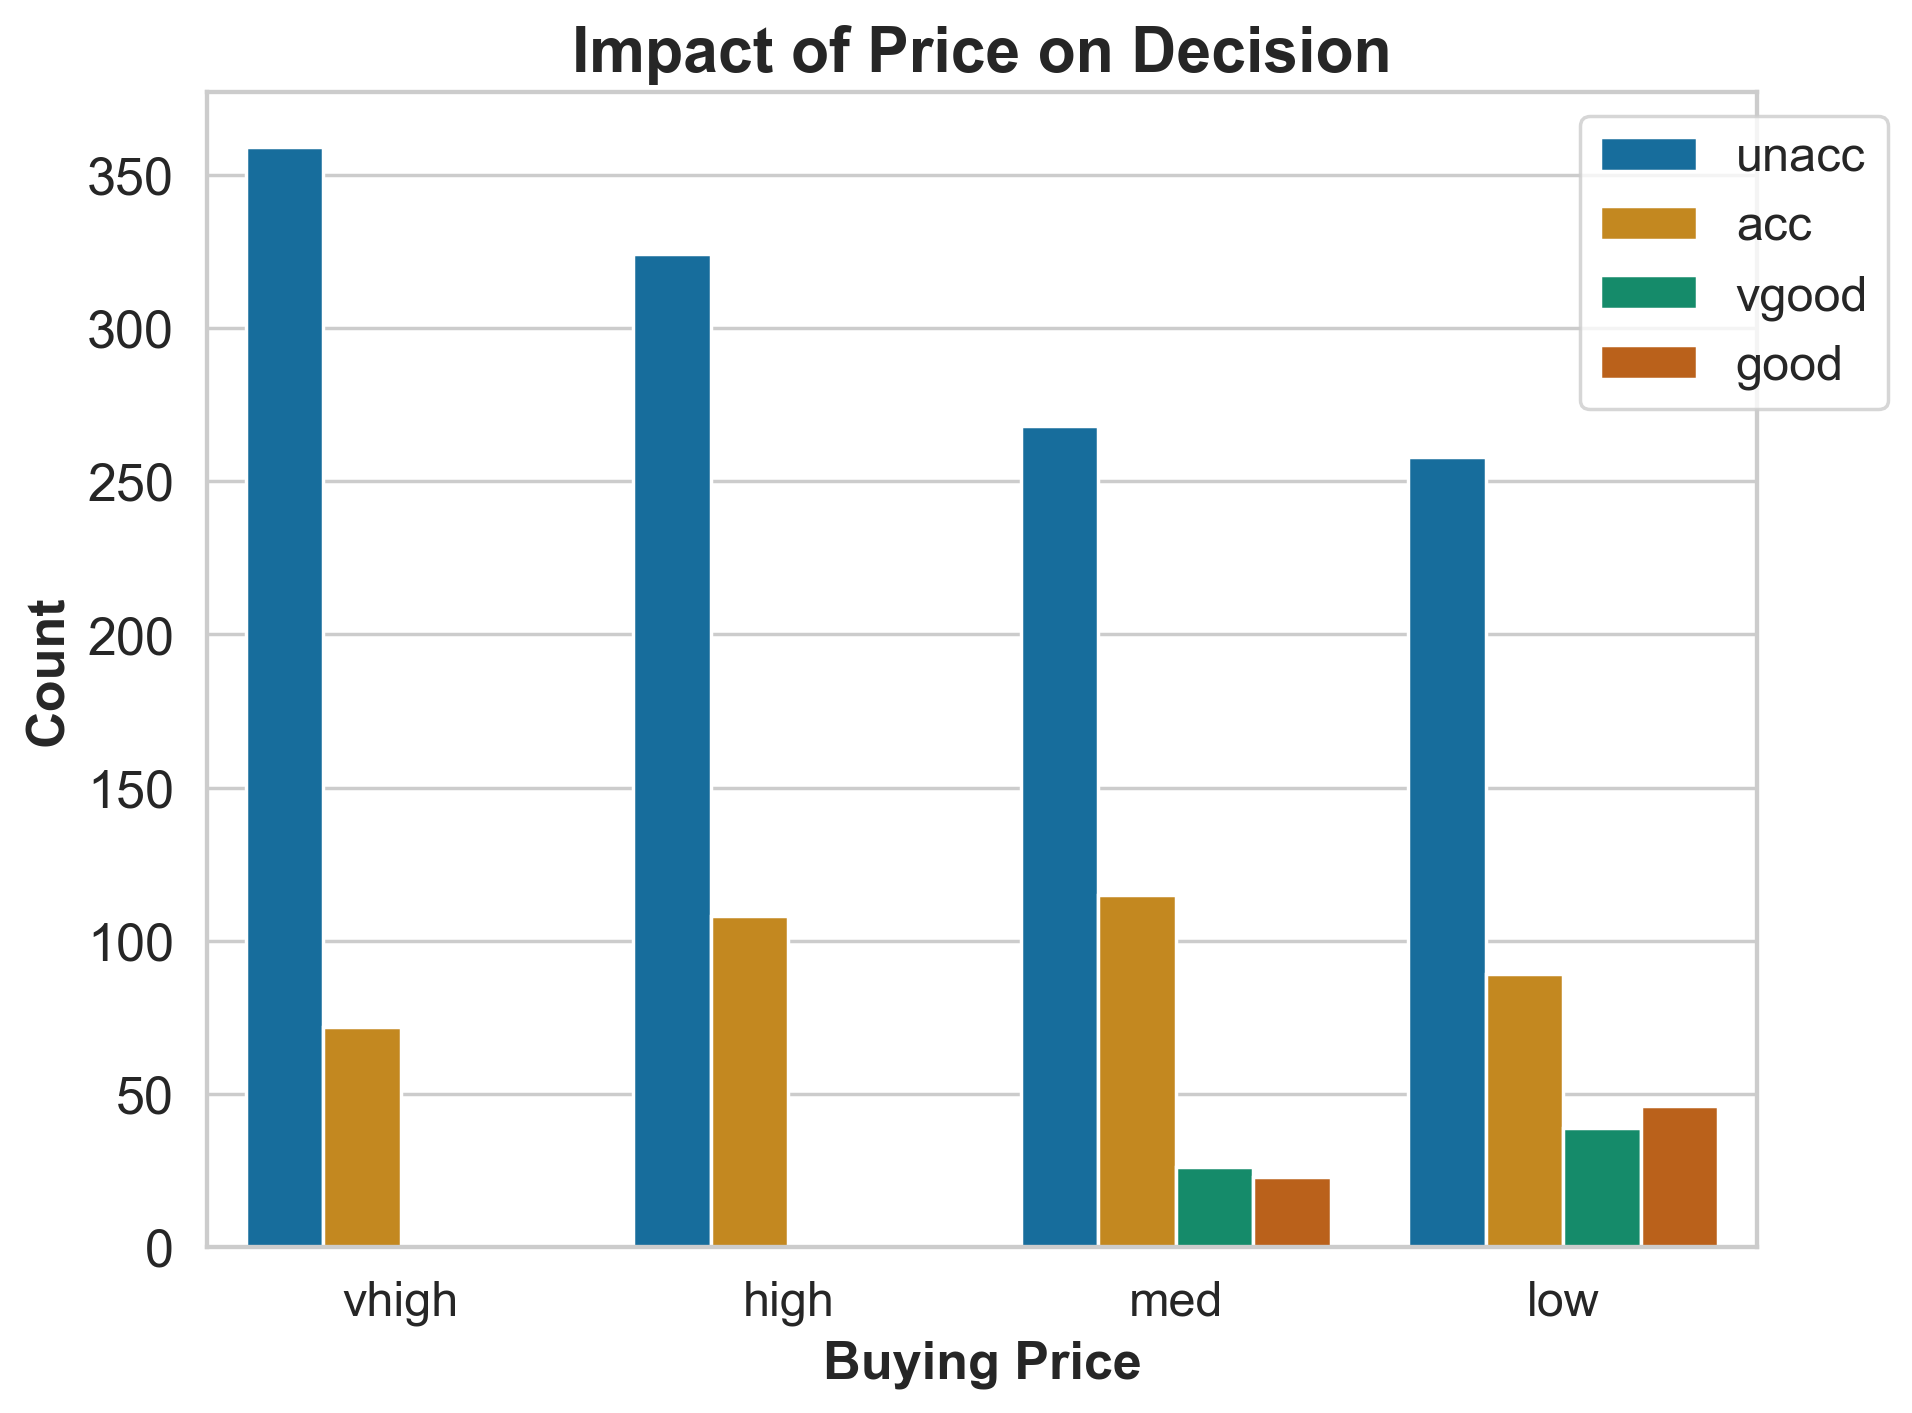

In [190]:
plt.figure(figsize=(8,6), dpi=250)
sns.countplot(x="buying", data=df, hue= "decision")
plt.xlabel("Buying Price", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
plt.title("Impact of Price on Decision", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income_workclass.png', dpi=300)

The cars having huge buying cost are more likely to be unacceptable where as the low cost car is considered as acceptable with good grade.  

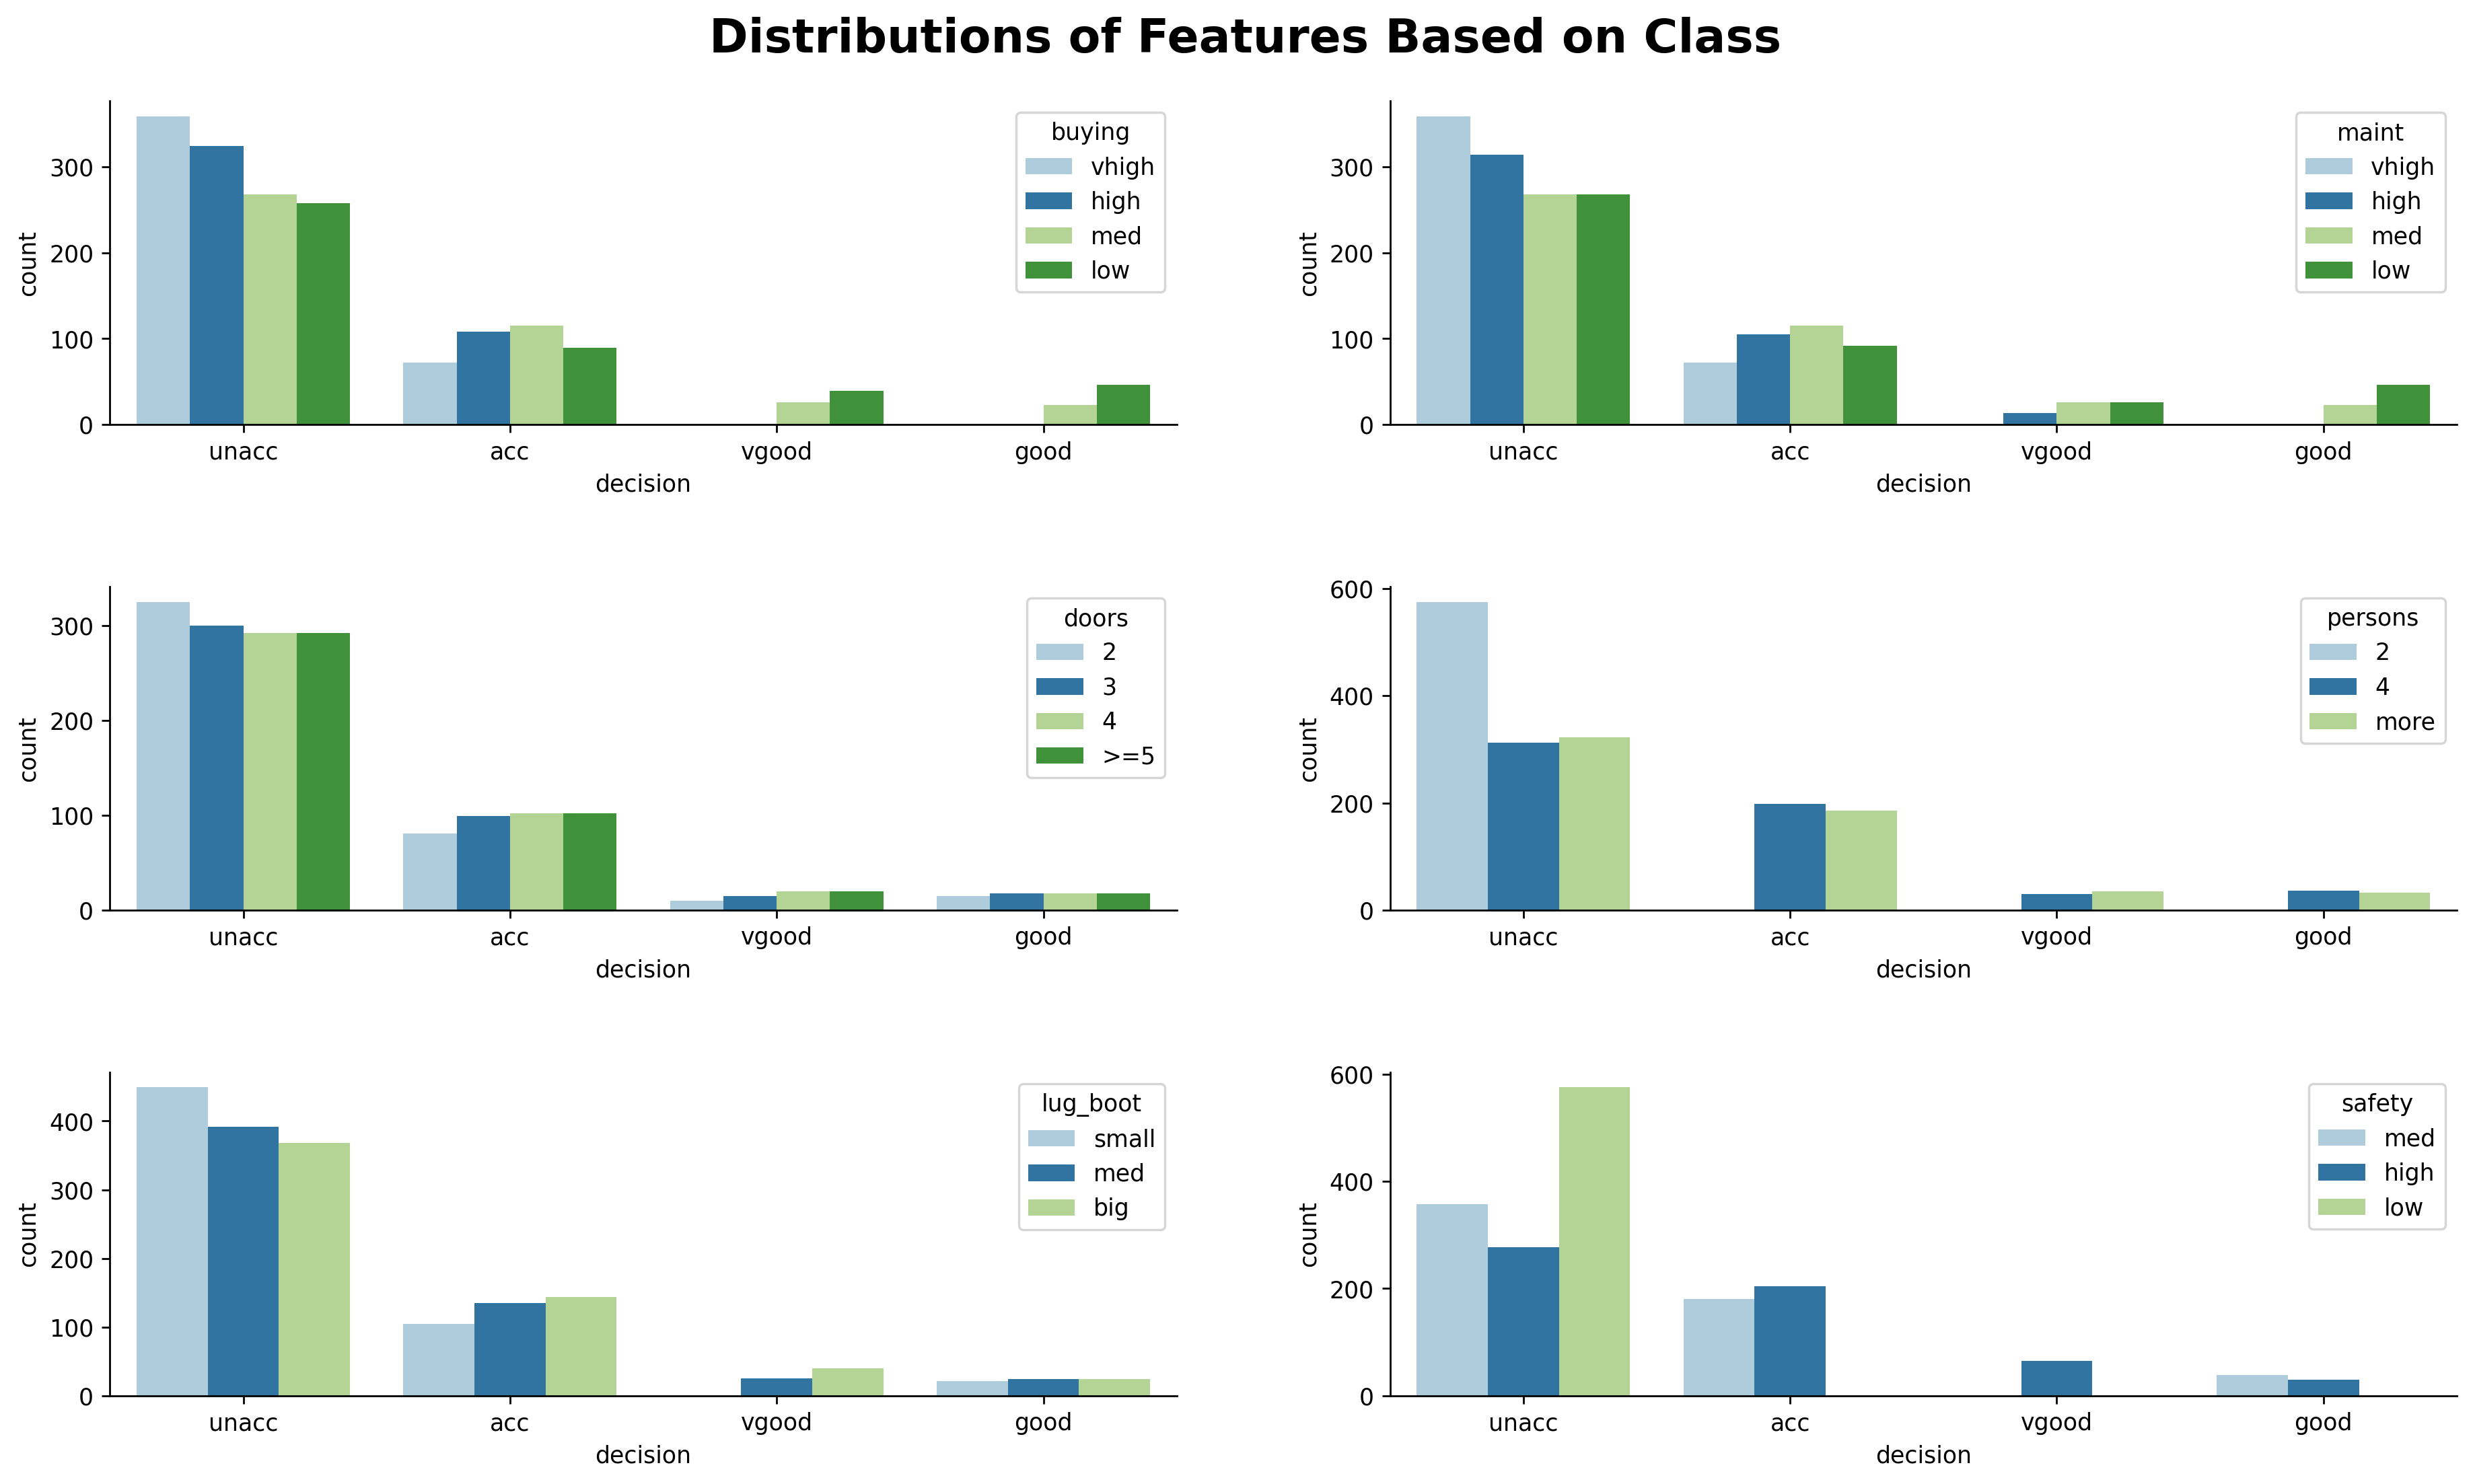

In [42]:
fig, axes = plt.subplots(3, 2, figsize = (18, 10), dpi= 250)
plt.subplots_adjust(hspace = 0.5)

fig.suptitle('Distributions of Features Based on Class', y = 0.93, fontsize = 20, fontweight= 'bold')

for pos, column in enumerate(df.columns[:-1]):
  sns.countplot(data = df, x = 'decision', hue = column, ax = axes.flat[pos], palette = 'Paired')
  

sns.despine()

##### Based on Maintenance cost

Text(0.5, 1.0, 'Maintenance Cost Contribution in Decision')

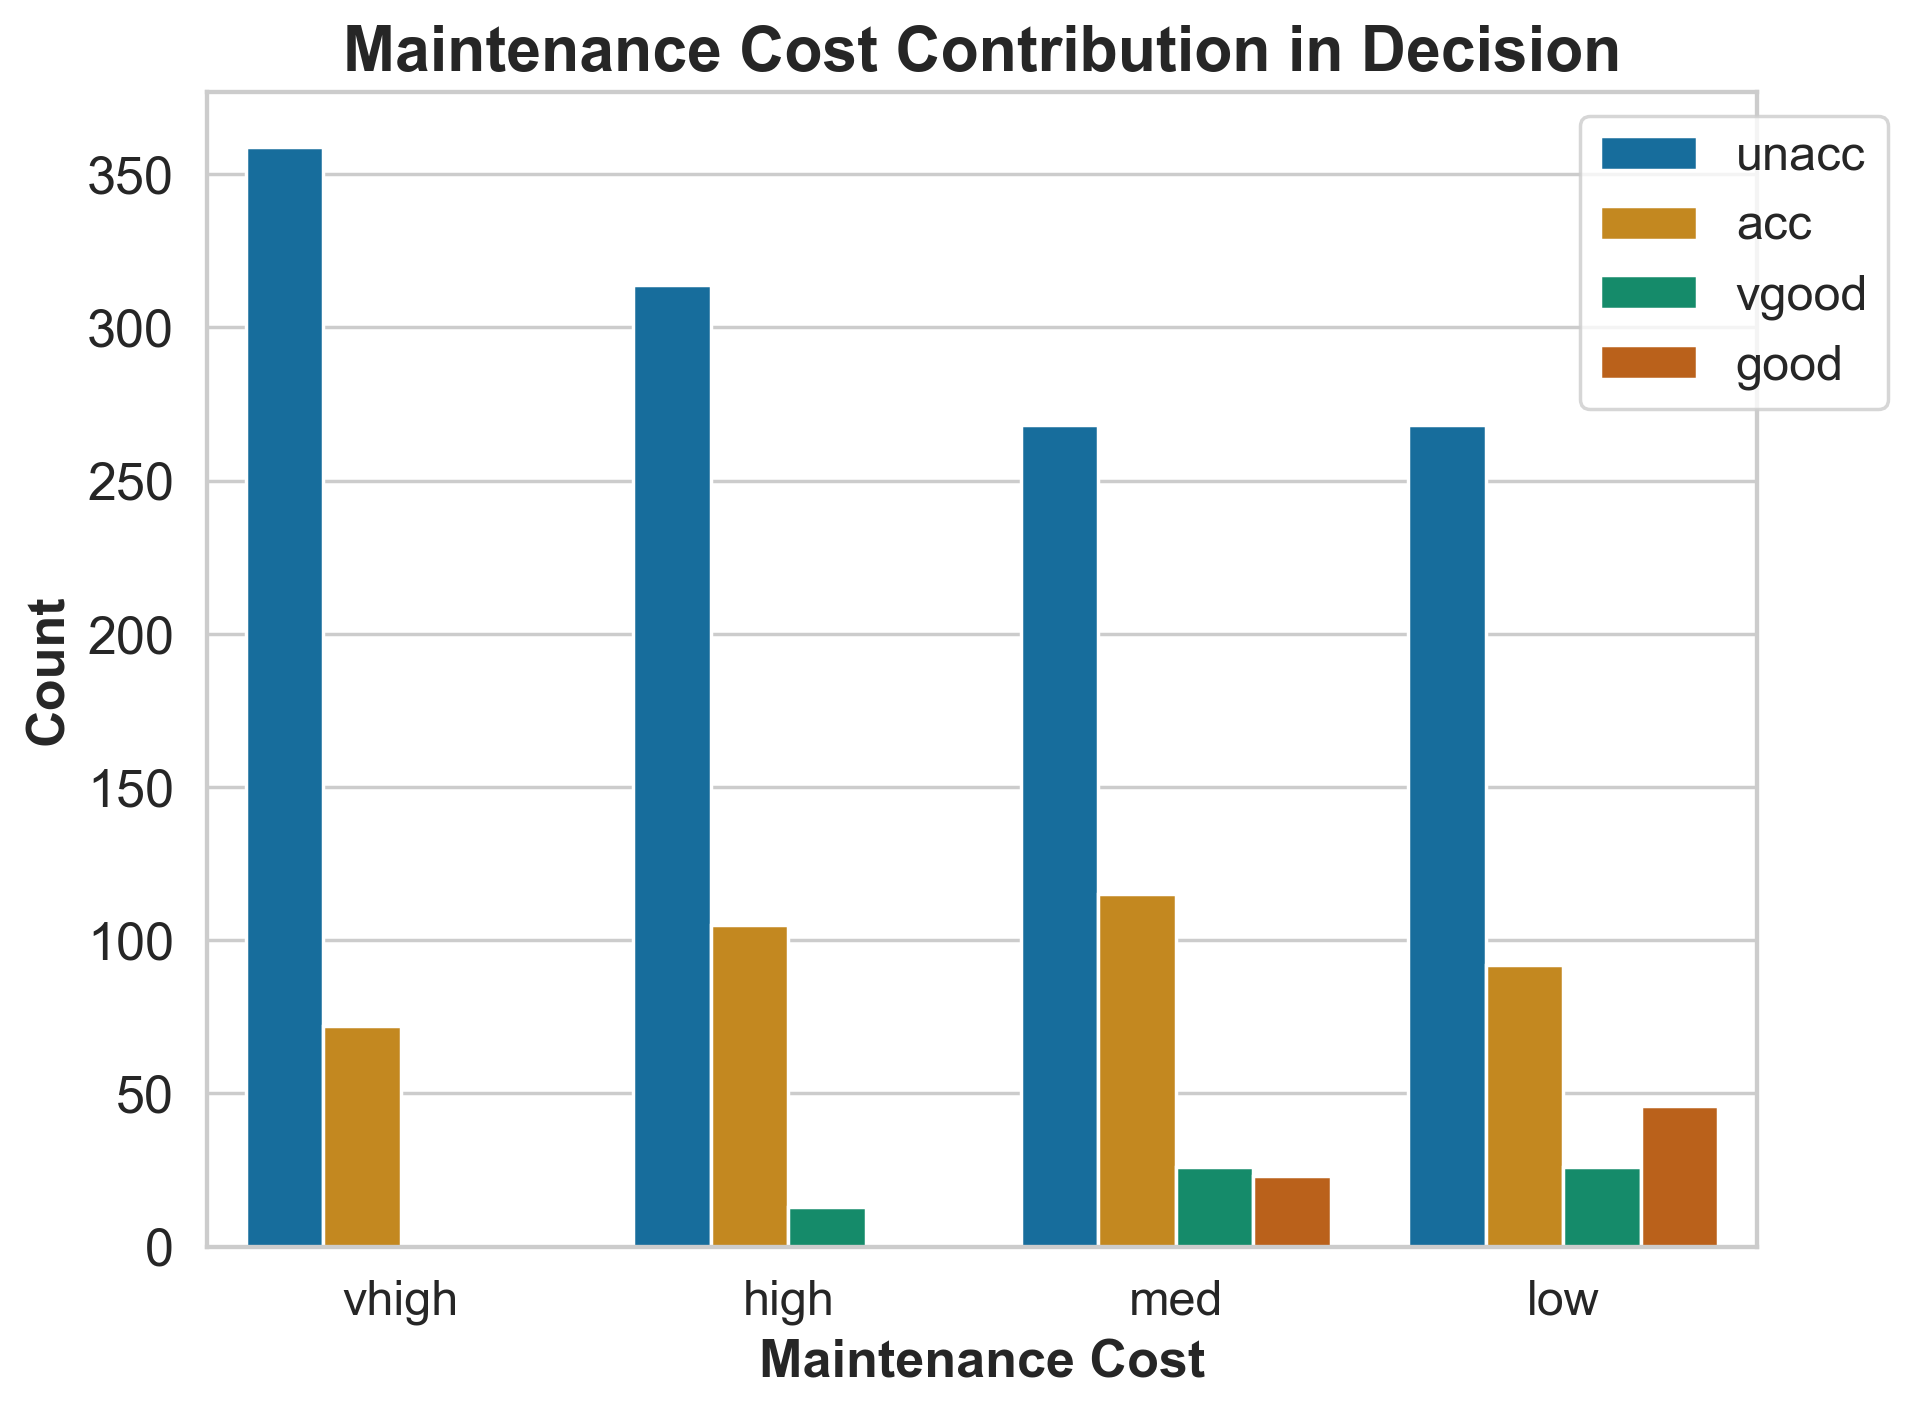

In [191]:
plt.figure(figsize=(8,6), dpi=250)
sns.countplot(x="maint", data=df, hue= "decision")
plt.xlabel("Maintenance Cost", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
plt.title("Maintenance Cost Contribution in Decision", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income_workclass.png', dpi=300)

It shows the car having very high maintenance cost have no chance to become good or very good graded. However, somewhat it is acceptable.

In [188]:
df_encoded= encoder.fit_transform(df)

##### Evaluation based on size of luggage which can be kept in car

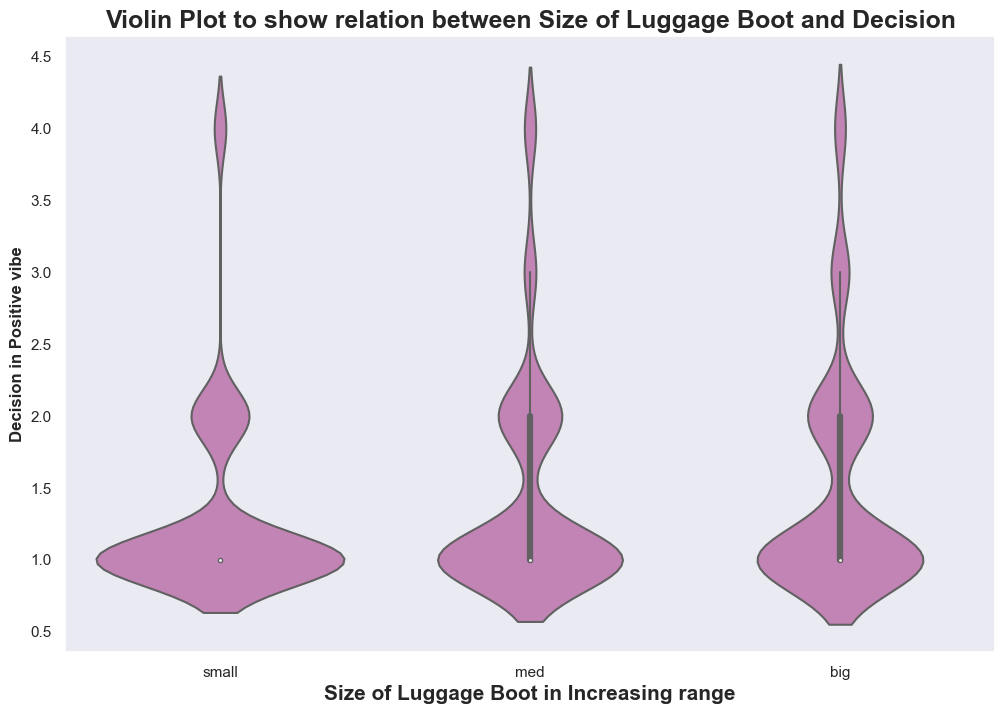

In [49]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = df['lug_boot'], y = df_encoded['decision'], color = 'm')
ax.set_title('Violin Plot to show relation between Size of Luggage Boot and Decision', fontsize = 18, fontweight='bold')
ax.set_xlabel('Size of Luggage Boot in Increasing range', fontsize = 15,fontweight='bold')
ax.set_ylabel('Decision in Positive vibe', fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Size of Luggage Boot in Classification')

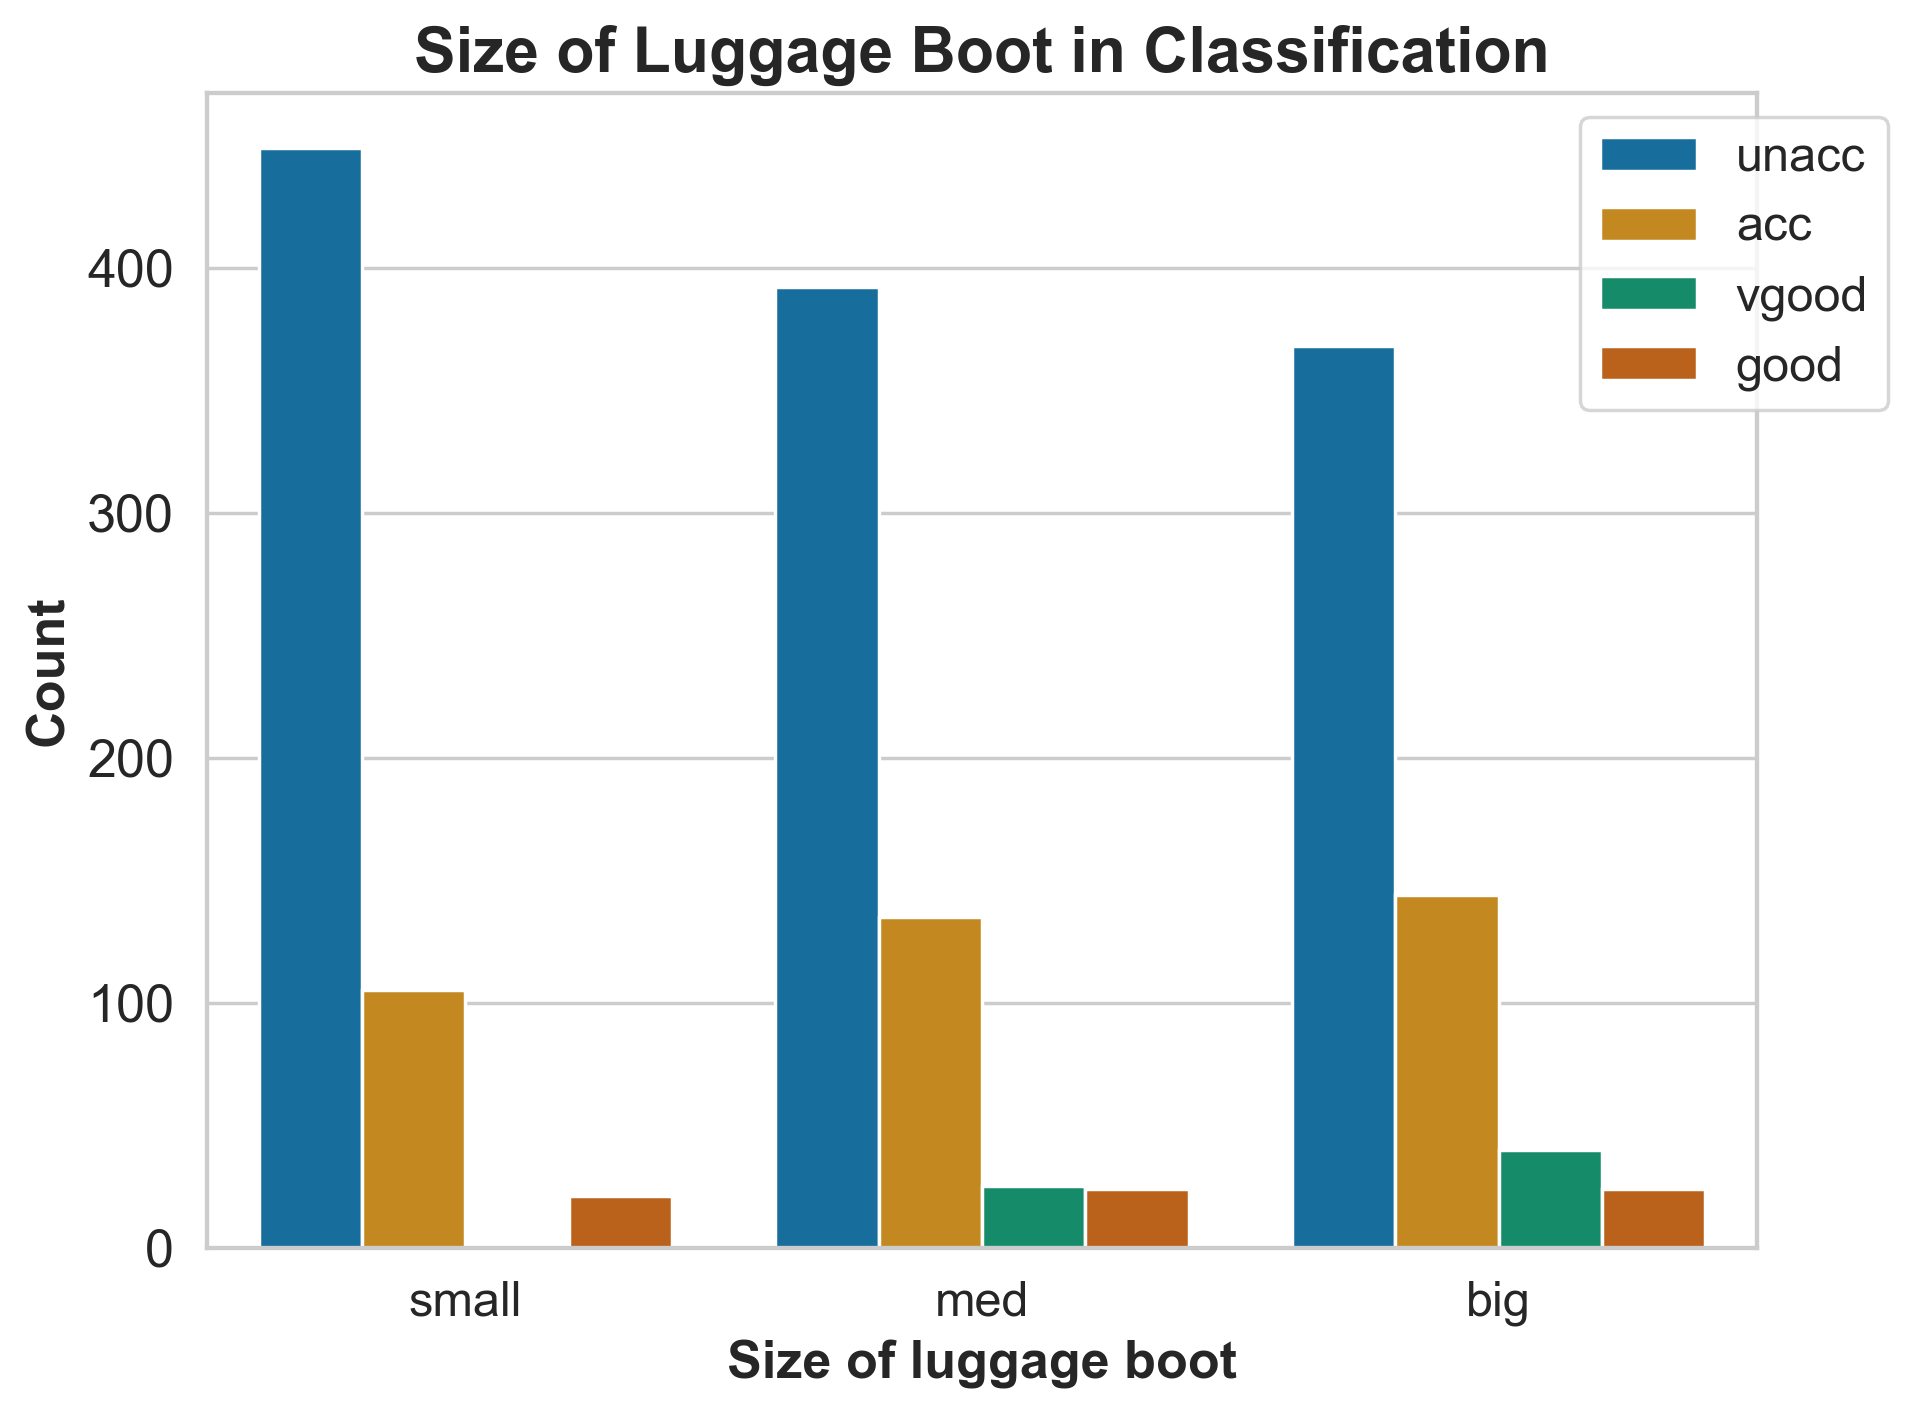

In [189]:
plt.figure(figsize=(8,6), dpi=250)
sns.countplot(x="lug_boot", data=df, hue= "decision")
plt.xlabel("Size of luggage boot", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
plt.title("Size of Luggage Boot in Classification", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income_workclass.png', dpi=300)

<Figure size 2000x1500 with 0 Axes>

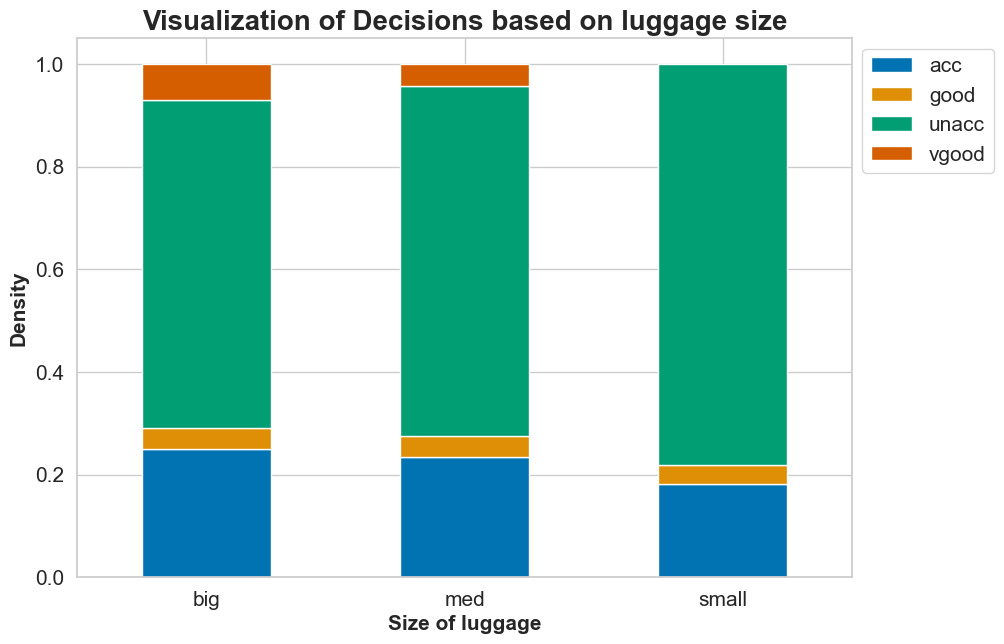

In [201]:
plt.figure(figsize=(8,6), dpi=250)
safety = pd.crosstab(df['lug_boot'], df['decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7)
)

plt.title('Visualization of Decisions based on luggage size', fontsize = 20, fontweight= "bold")
plt.xlabel('Size of luggage', fontsize = 15, fontweight= "bold")
plt.ylabel('Density', fontsize = 15, fontweight= "bold")
plt.xticks(fontsize = 15, rotation= 'horizontal')
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, bbox_to_anchor=(1, 1))
plt.show()

##### Safety in decision

Text(0.5, 1.0, 'Visualization of Safety in decision')

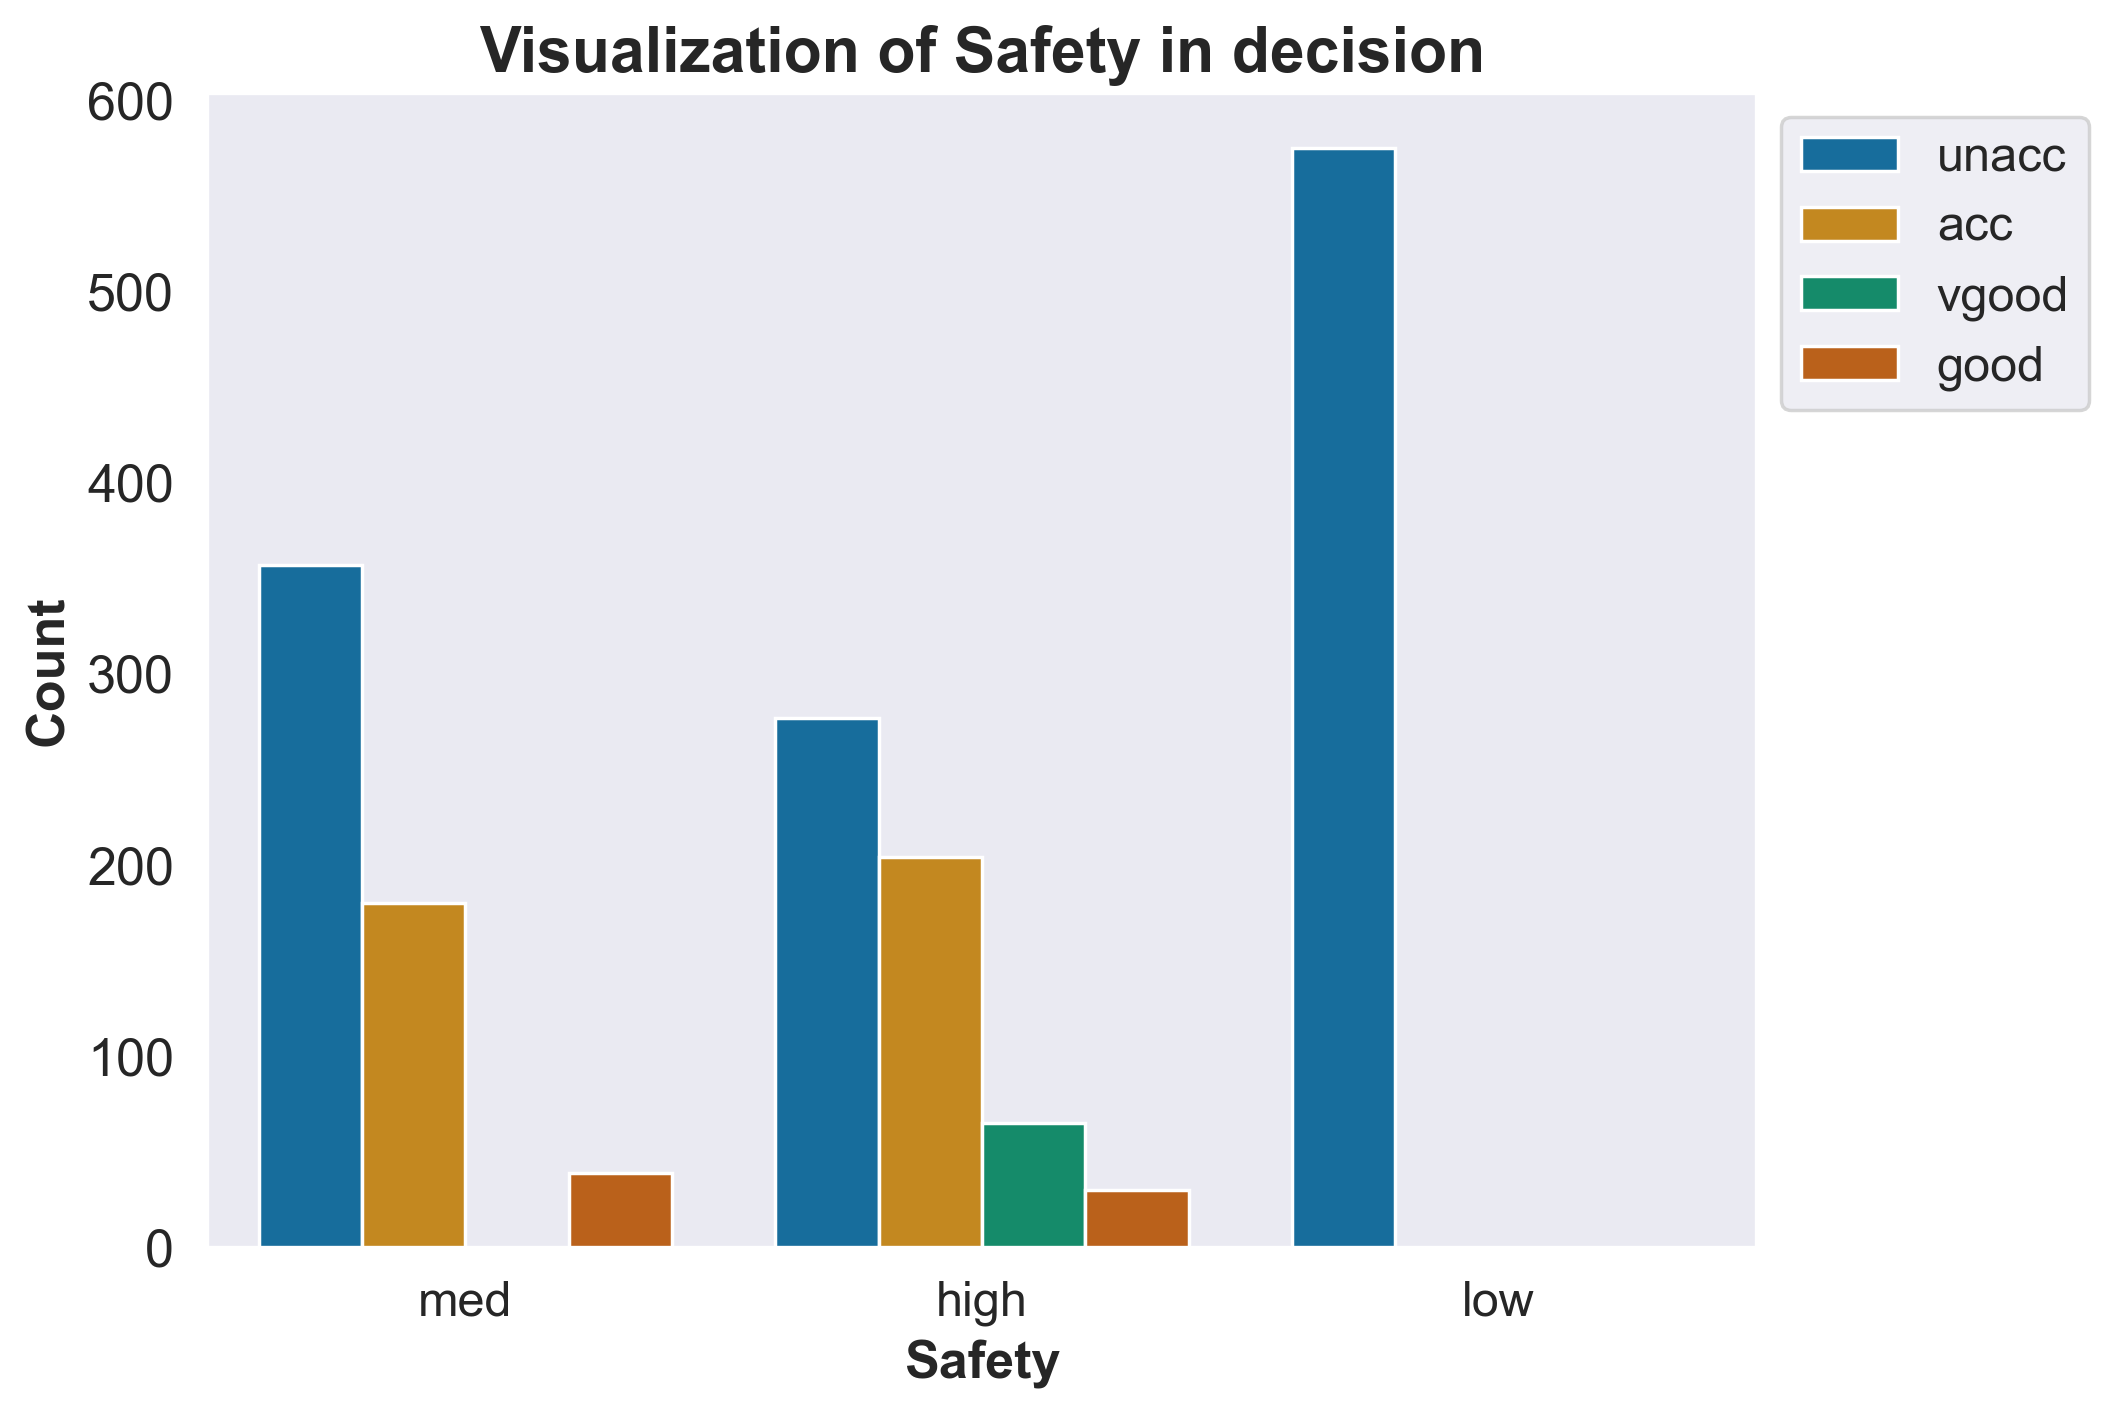

In [53]:
plt.figure(figsize=(8,6), dpi=250)
sns.countplot(x="safety", data=df, hue= "decision")
plt.xlabel("Safety", fontsize=15, fontweight="bold")
plt.ylabel("Count", fontsize=15, fontweight= "bold")
plt.xticks(fontsize= 14)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title("Visualization of Safety in decision", fontdict={"fontsize": 18, "fontweight": "bold"})
#plt.savefig('income_workclass.png', dpi=300)

It shows that if car is not safe then it is not acceptable

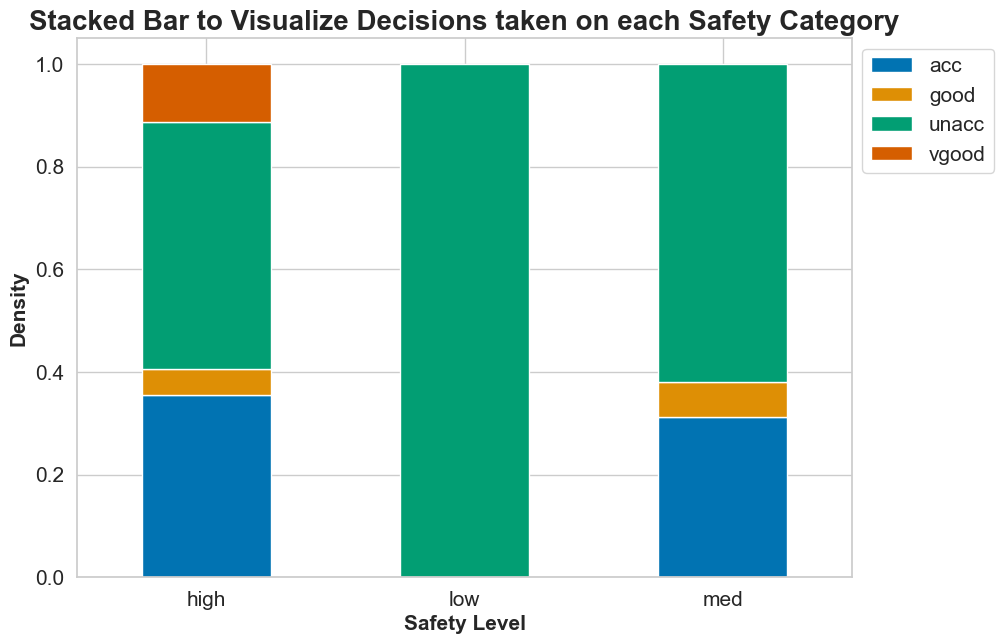

In [200]:
safety = pd.crosstab(df['safety'], df['decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar to Visualize Decisions taken on each Safety Category', fontsize = 20, fontweight= 'bold')
plt.xticks(fontsize = 15, rotation= 'horizontal')
plt.yticks(fontsize = 15)
plt.xlabel('Safety Level', fontsize = 15, fontweight= 'bold')
plt.ylabel('Density', fontsize = 15, fontweight= 'bold')
plt.legend(fontsize = 15, bbox_to_anchor=(1, 1))
plt.show()

##### Role of car capacity in grading car

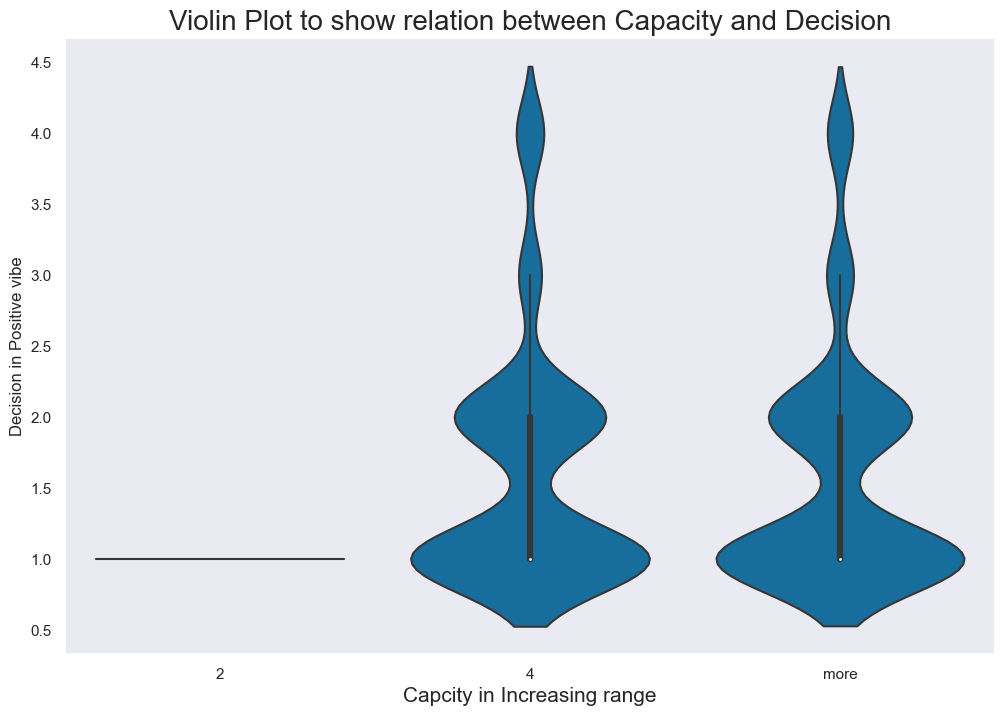

In [59]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = df['persons'], y = df_encoded['decision'], color = 'b')
ax.set_title('Violin Plot to show relation between Capacity and Decision', fontsize = 20)
ax.set_xlabel('Capcity in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

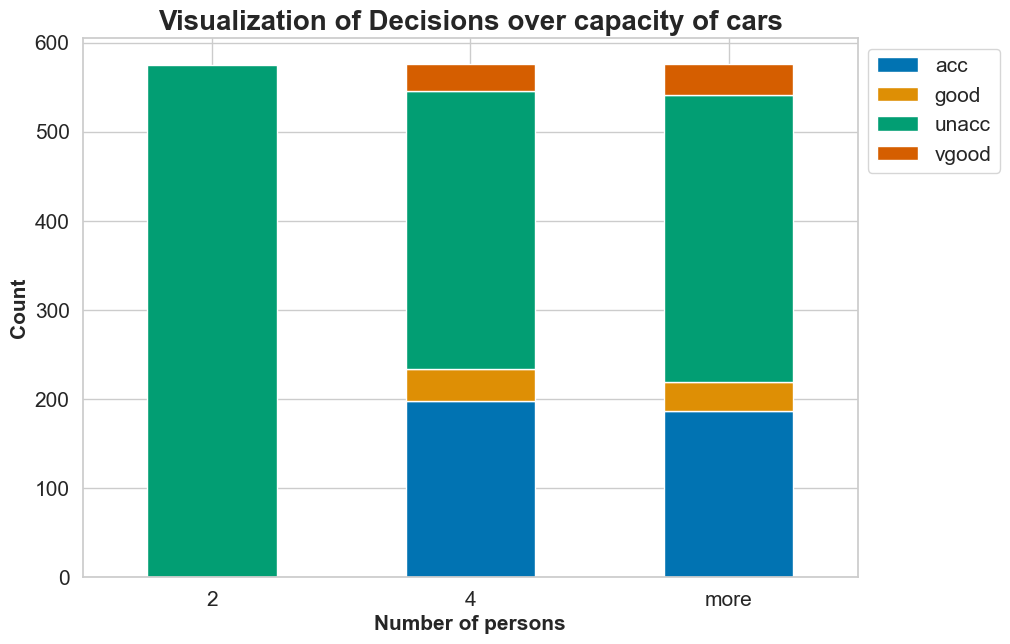

In [202]:
persons = pd.crosstab(df['persons'], df['decision'])
persons.plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Visualization of Decisions over capacity of cars', fontsize = 20, fontweight= 'bold')
plt.xlabel('Number of persons', fontsize = 15, fontweight= 'bold')
plt.ylabel('Count', fontsize = 15, fontweight= 'bold')
plt.xticks(fontsize = 15, rotation= 'horizontal')
plt.yticks(fontsize = 15)
plt.legend(fontsize= 15, bbox_to_anchor=(1,1))
plt.show()

##### Box plot 

In [55]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'decision'],
      dtype='object')

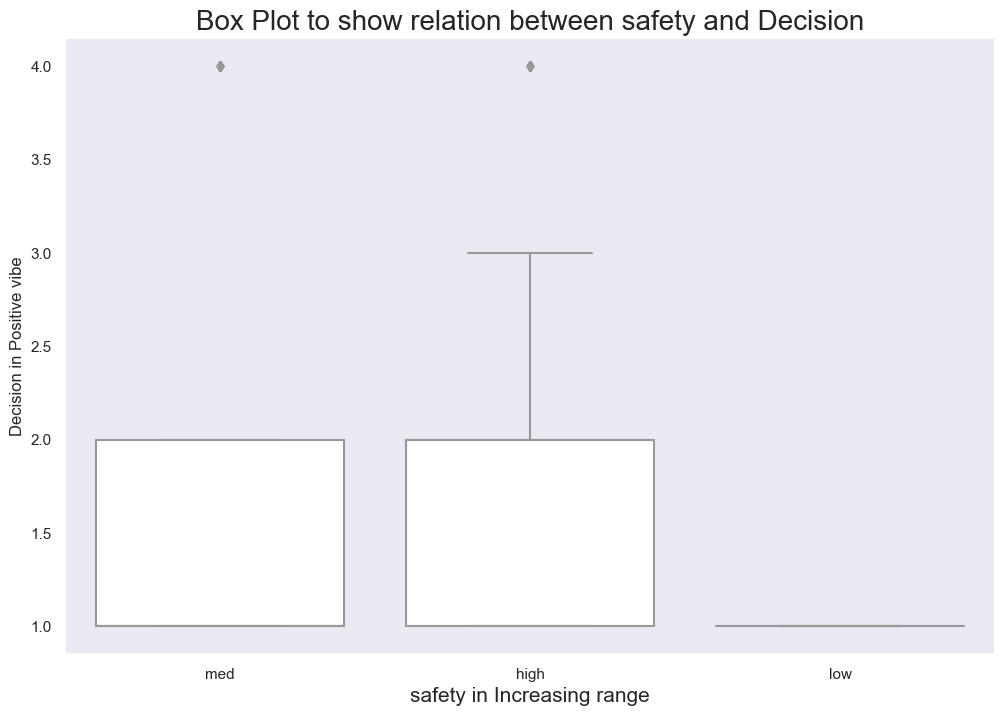

In [67]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.boxplot(x = df['safety'], y= df_encoded['decision'], color = 'w')
ax.set_title('Box Plot to show relation between safety and Decision', fontsize = 20)
ax.set_xlabel('safety in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

<AxesSubplot:xlabel='safety', ylabel='count'>

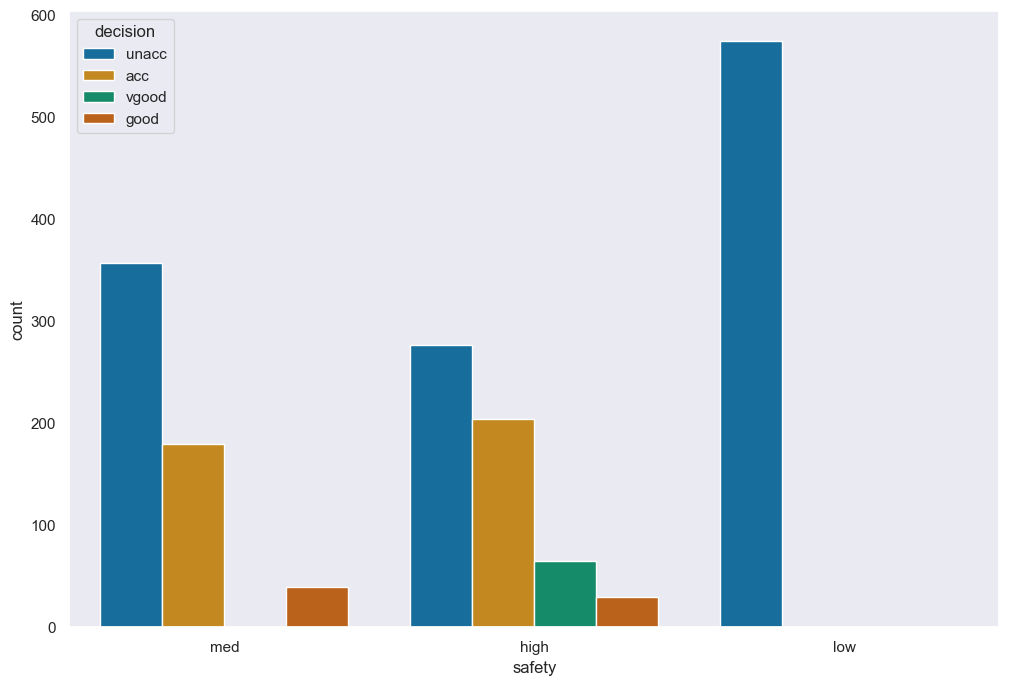

In [70]:
sns.countplot(x = df['safety'], data=df, hue= df['decision'])

##### Visualizing decision using pie plot

In [129]:
df.decision.value_counts().tolist()

[1209, 384, 69, 65]

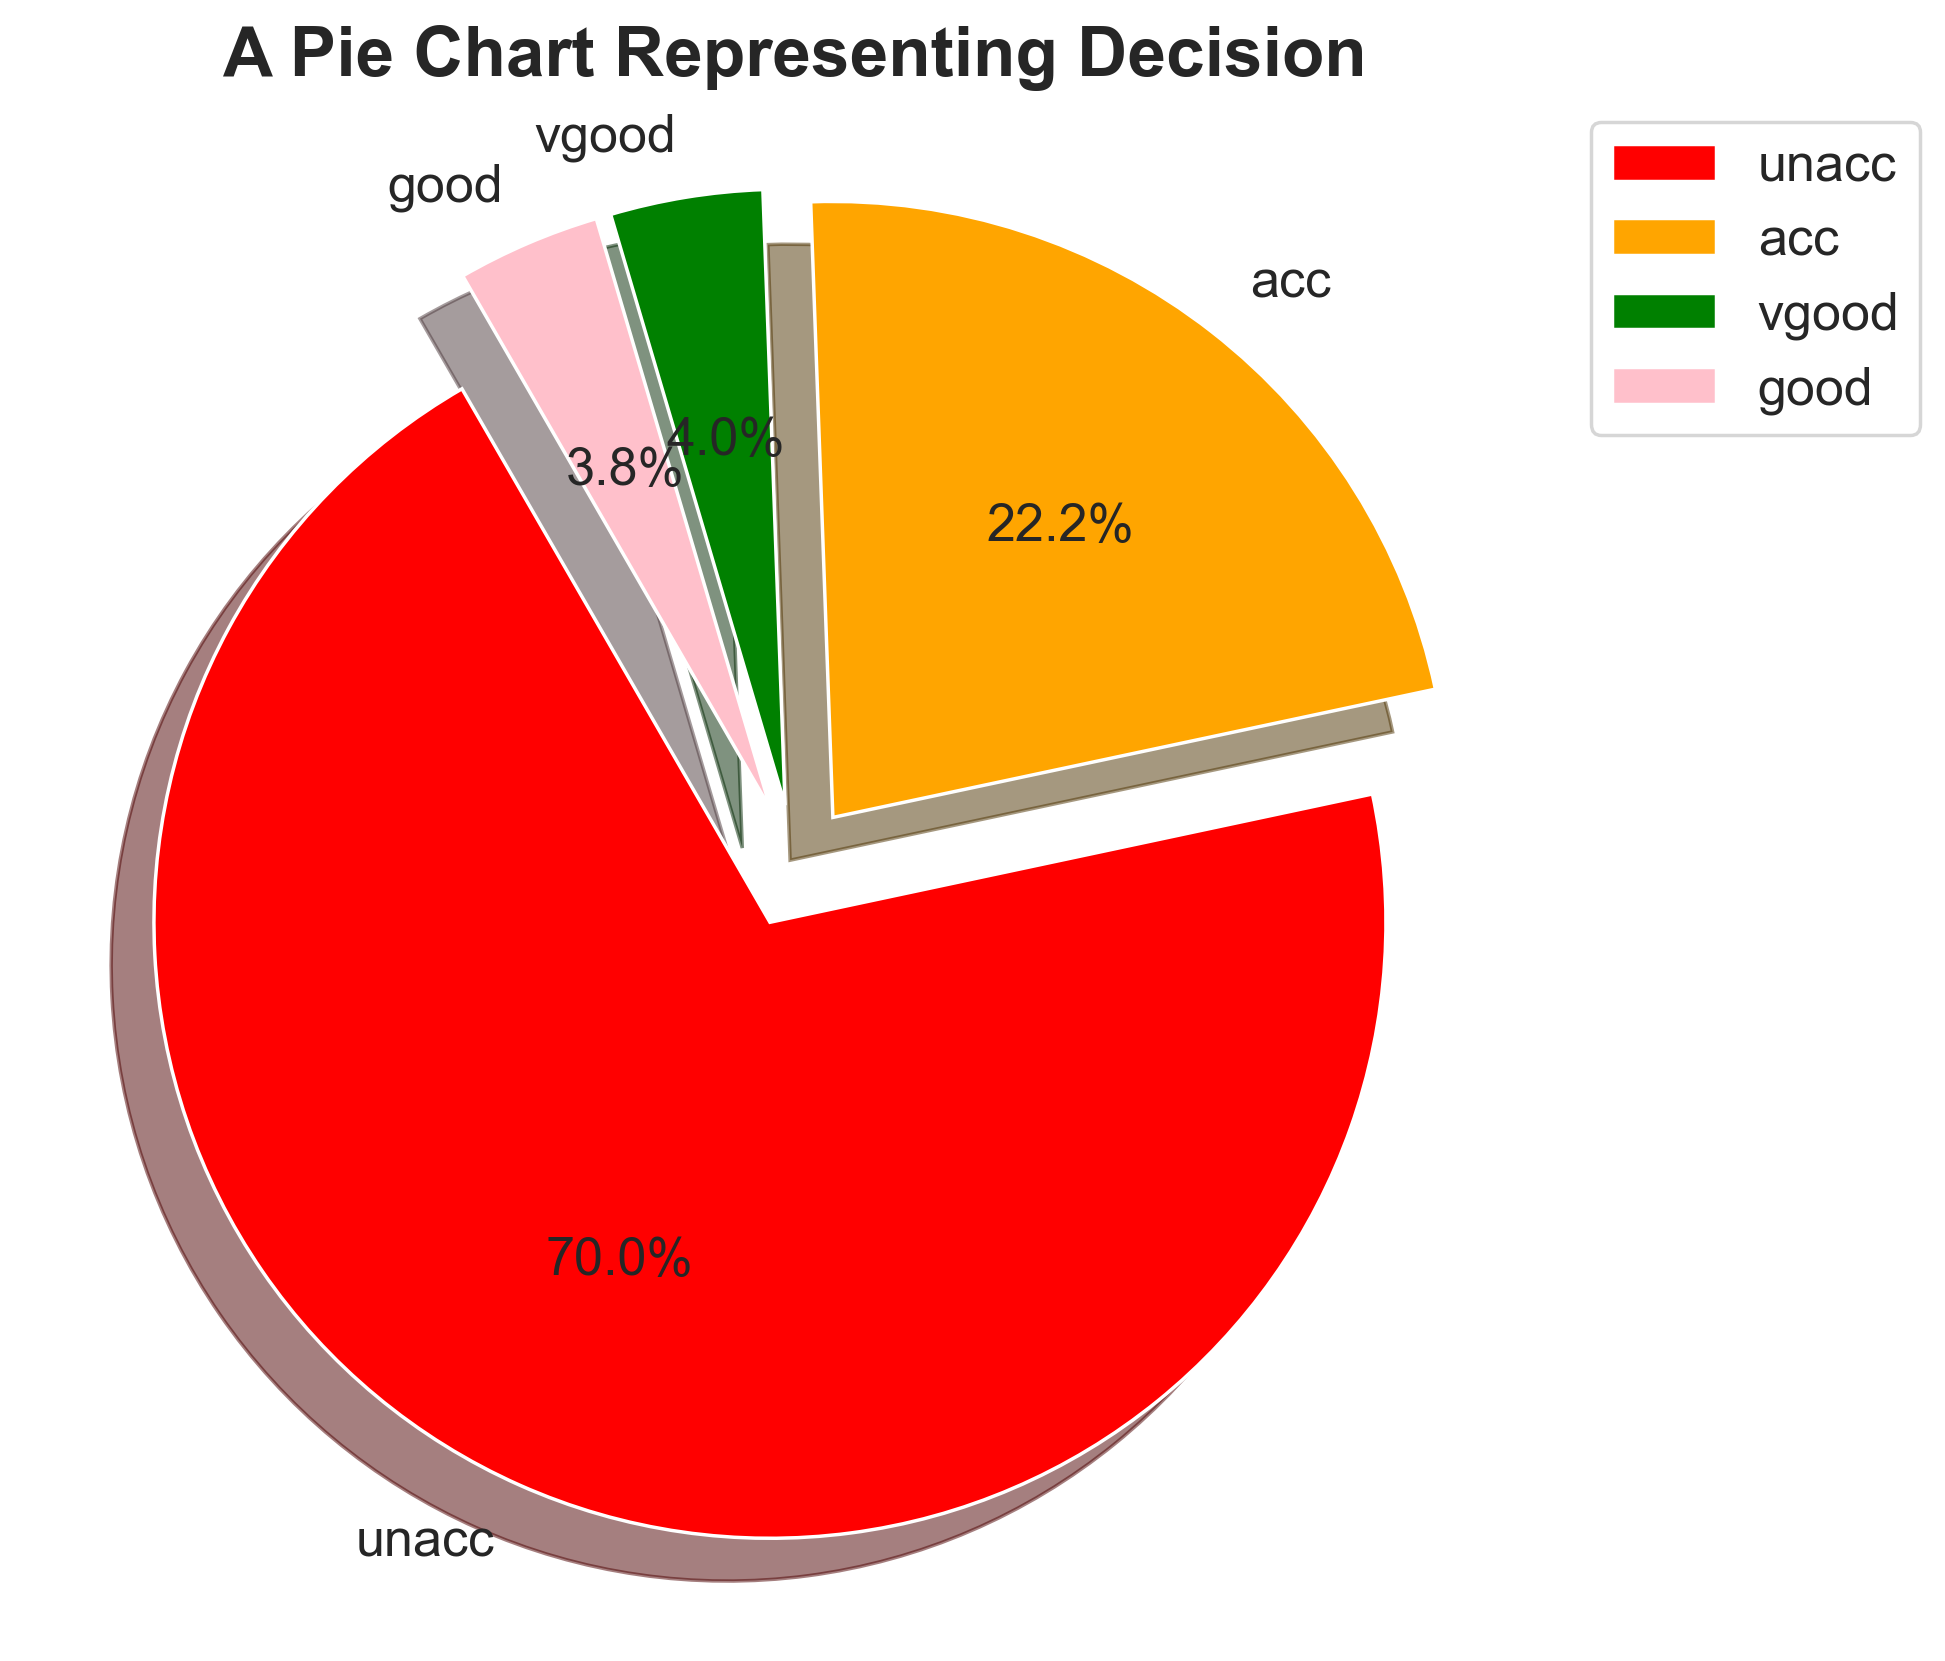

In [211]:
labels = df.decision.unique().tolist()
colors = ['red', 'orange', 'green', 'pink']
size = df.decision.value_counts().tolist()
explode = [0.1, 0.1, 0.1, 0.1]
plt.figure(dpi=250)
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120, textprops={'fontsize': 15})
plt.title('A Pie Chart Representing Decision', fontsize = 20, fontweight= 'bold')
plt.axis('off')

plt.legend(fontsize= 15, bbox_to_anchor=(1,1))
plt.show()

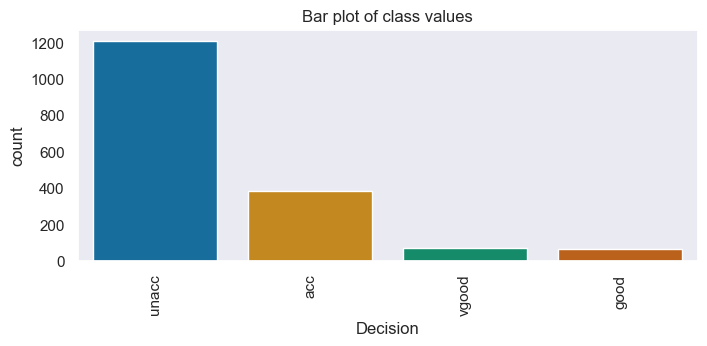

In [135]:
plt.figure(figsize=(8, 3))
sns.barplot(x=df['decision'].unique(), y=df['decision'].value_counts())
plt.xlabel("Decision")
plt.ylabel("count")
plt.title('Bar plot of class values')
plt.xticks(rotation=90)
plt.show()

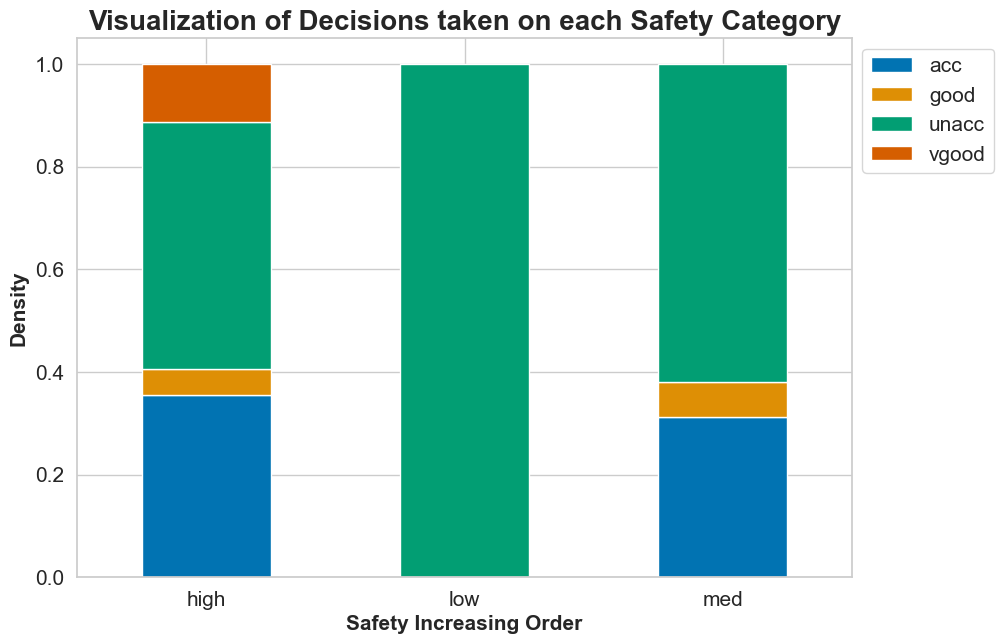

In [212]:
safety = pd.crosstab(df['safety'], df['decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Visualization of Decisions taken on each Safety Category', fontsize = 20, fontweight= 'bold')
plt.xlabel('Safety Increasing Order', fontsize = 15, fontweight= 'bold')
plt.ylabel('Density', fontsize = 15, fontweight= 'bold')
plt.xticks(fontsize = 15, rotation= 'horizontal')
plt.yticks(fontsize = 15)
plt.legend(fontsize= 15, bbox_to_anchor=(1,1))
plt.show()

##### Role of number of door in decision

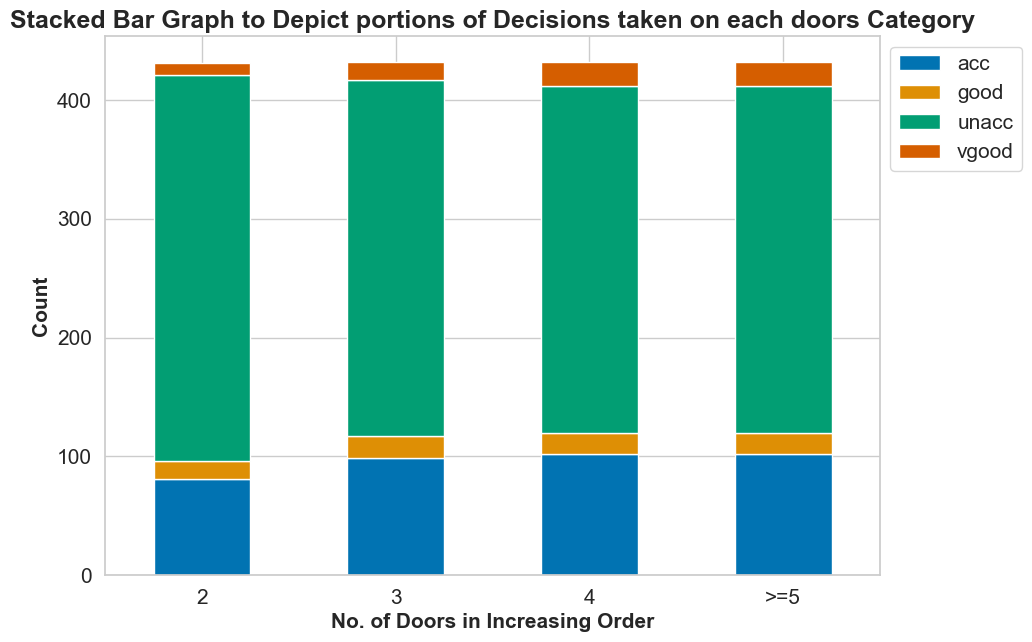

In [215]:

pd.crosstab(df['doors'], df['decision']).plot(kind = 'bar', stacked = True, figsize = (10, 7))


plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each doors Category', fontsize = 18, fontweight="bold")
plt.xlabel('No. of Doors in Increasing Order', fontsize = 15, fontweight="bold")
plt.ylabel('Count', fontsize = 15, fontweight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation='horizontal')
#plt.legend(loc="upper right")
plt.legend( fontsize= 15, bbox_to_anchor=(1,1))
plt.show()

### MODELLING

##### Splitting of data into training and testing dataset

In [136]:
#Defining dependent and target variables

X = df.drop(['decision'], axis=1)

Y = df['decision']

In [137]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [139]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape, Y_test.shape

((1157, 6), (570, 6), (570,))

In [140]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [141]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,>=5,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


Since all the data entry are ordinal categorical data, we encode them using encoder

In [143]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [144]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


#### Decision Tree with criteron gini index

In [145]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [146]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

##### Predicting the test case

In [147]:
y_pred_gini = clf_gini.predict(X_test)

##### Accuracy checking 

In [148]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


##### Checking for overfitting and underfitting

In [149]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.7848
Test set score: 0.8053


Here, the training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053. These two values are quite comparable. So, there is no sign of overfitting.

##### Visualizing decision tree with graphviz

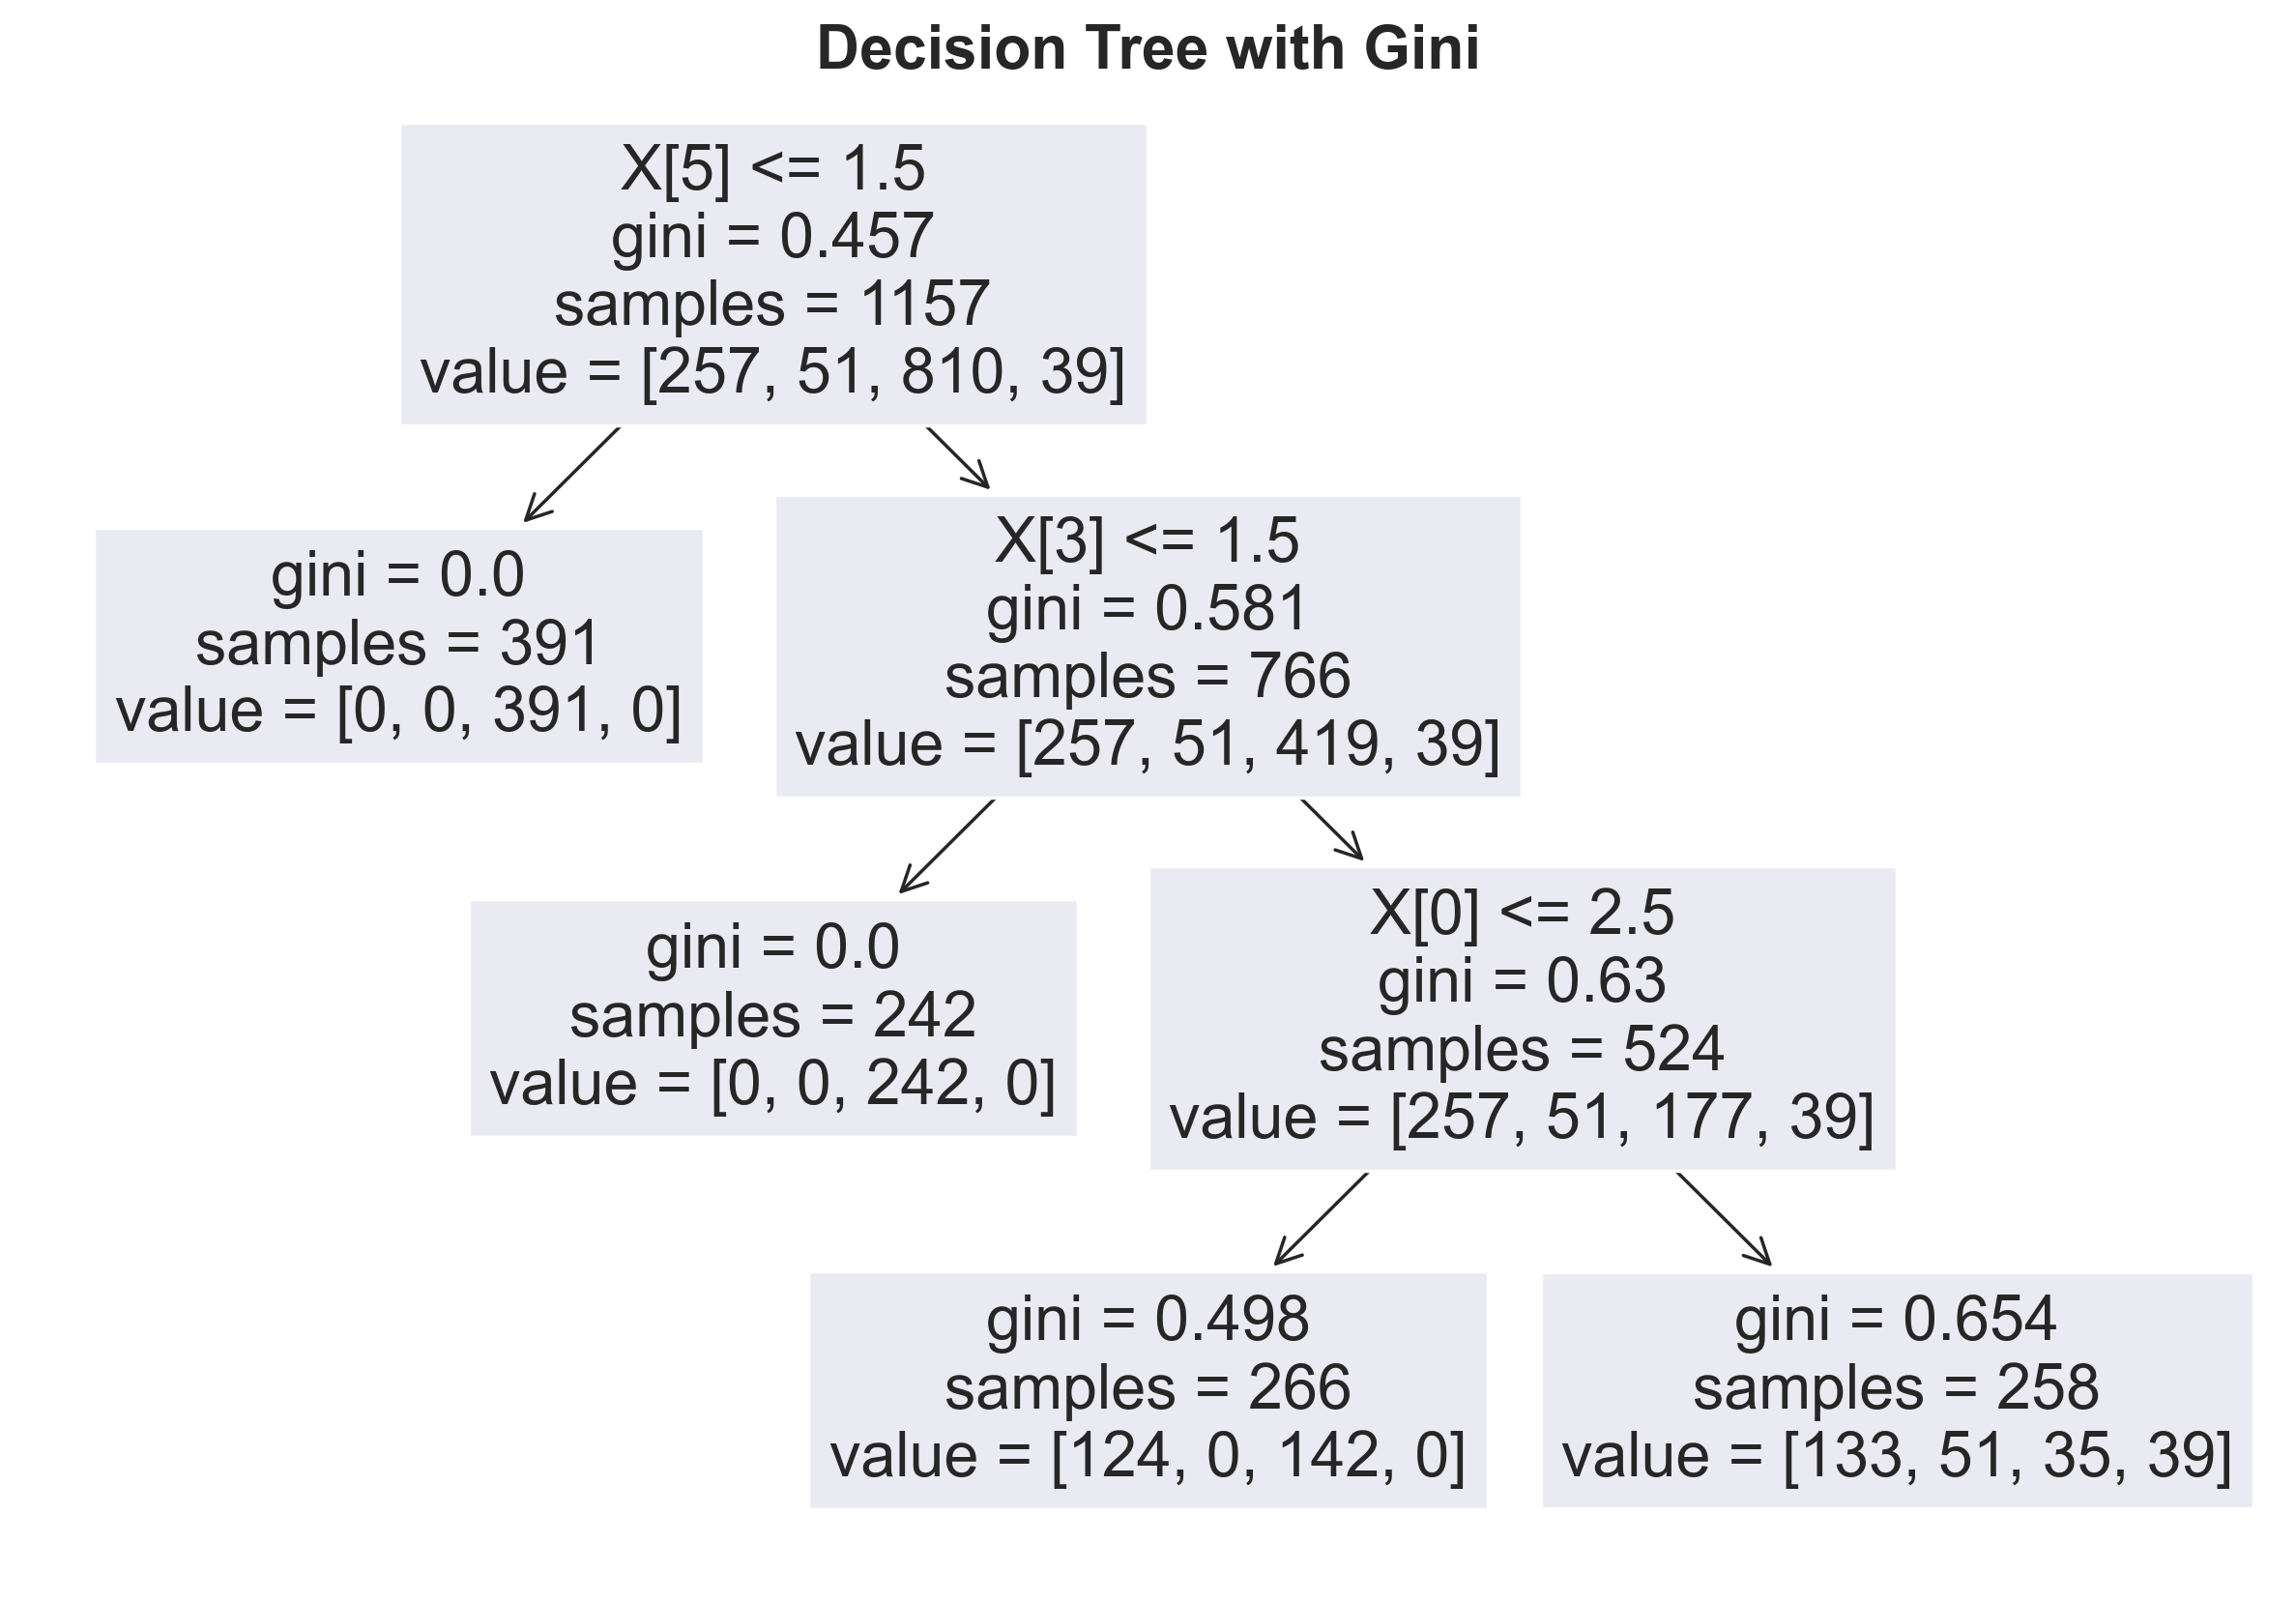

In [163]:
from sklearn import tree
plt.figure(figsize=(12,8), dpi= 250)

tree.plot_tree(clf_gini.fit(X_train, Y_train)) 
plt.title("Decision Tree with Gini", fontsize= 18, fontweight= 'bold')
plt.show()

In [153]:
import graphviz 

In [ ]:


plt.figure(figsize=(12,8))

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=Y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

plt.title("Decision Tree using Entropy", fontsize= 18, fontweight= 'bold')
plt.show()

graph 

#### Decision Tree with Criterion entropy

In [155]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

##### Predicting the test set

In [156]:
y_pred_en= clf_en.predict(X_test)

##### Checking accuracy

In [157]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


##### Checking Overfitting and underfitting

In [158]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.7848
Test set score: 0.8053


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7848 while the test-set accuracy to be 0.8053. These two values are quite comparable. So, there is no sign of overfitting.

##### Visualizing decision tree

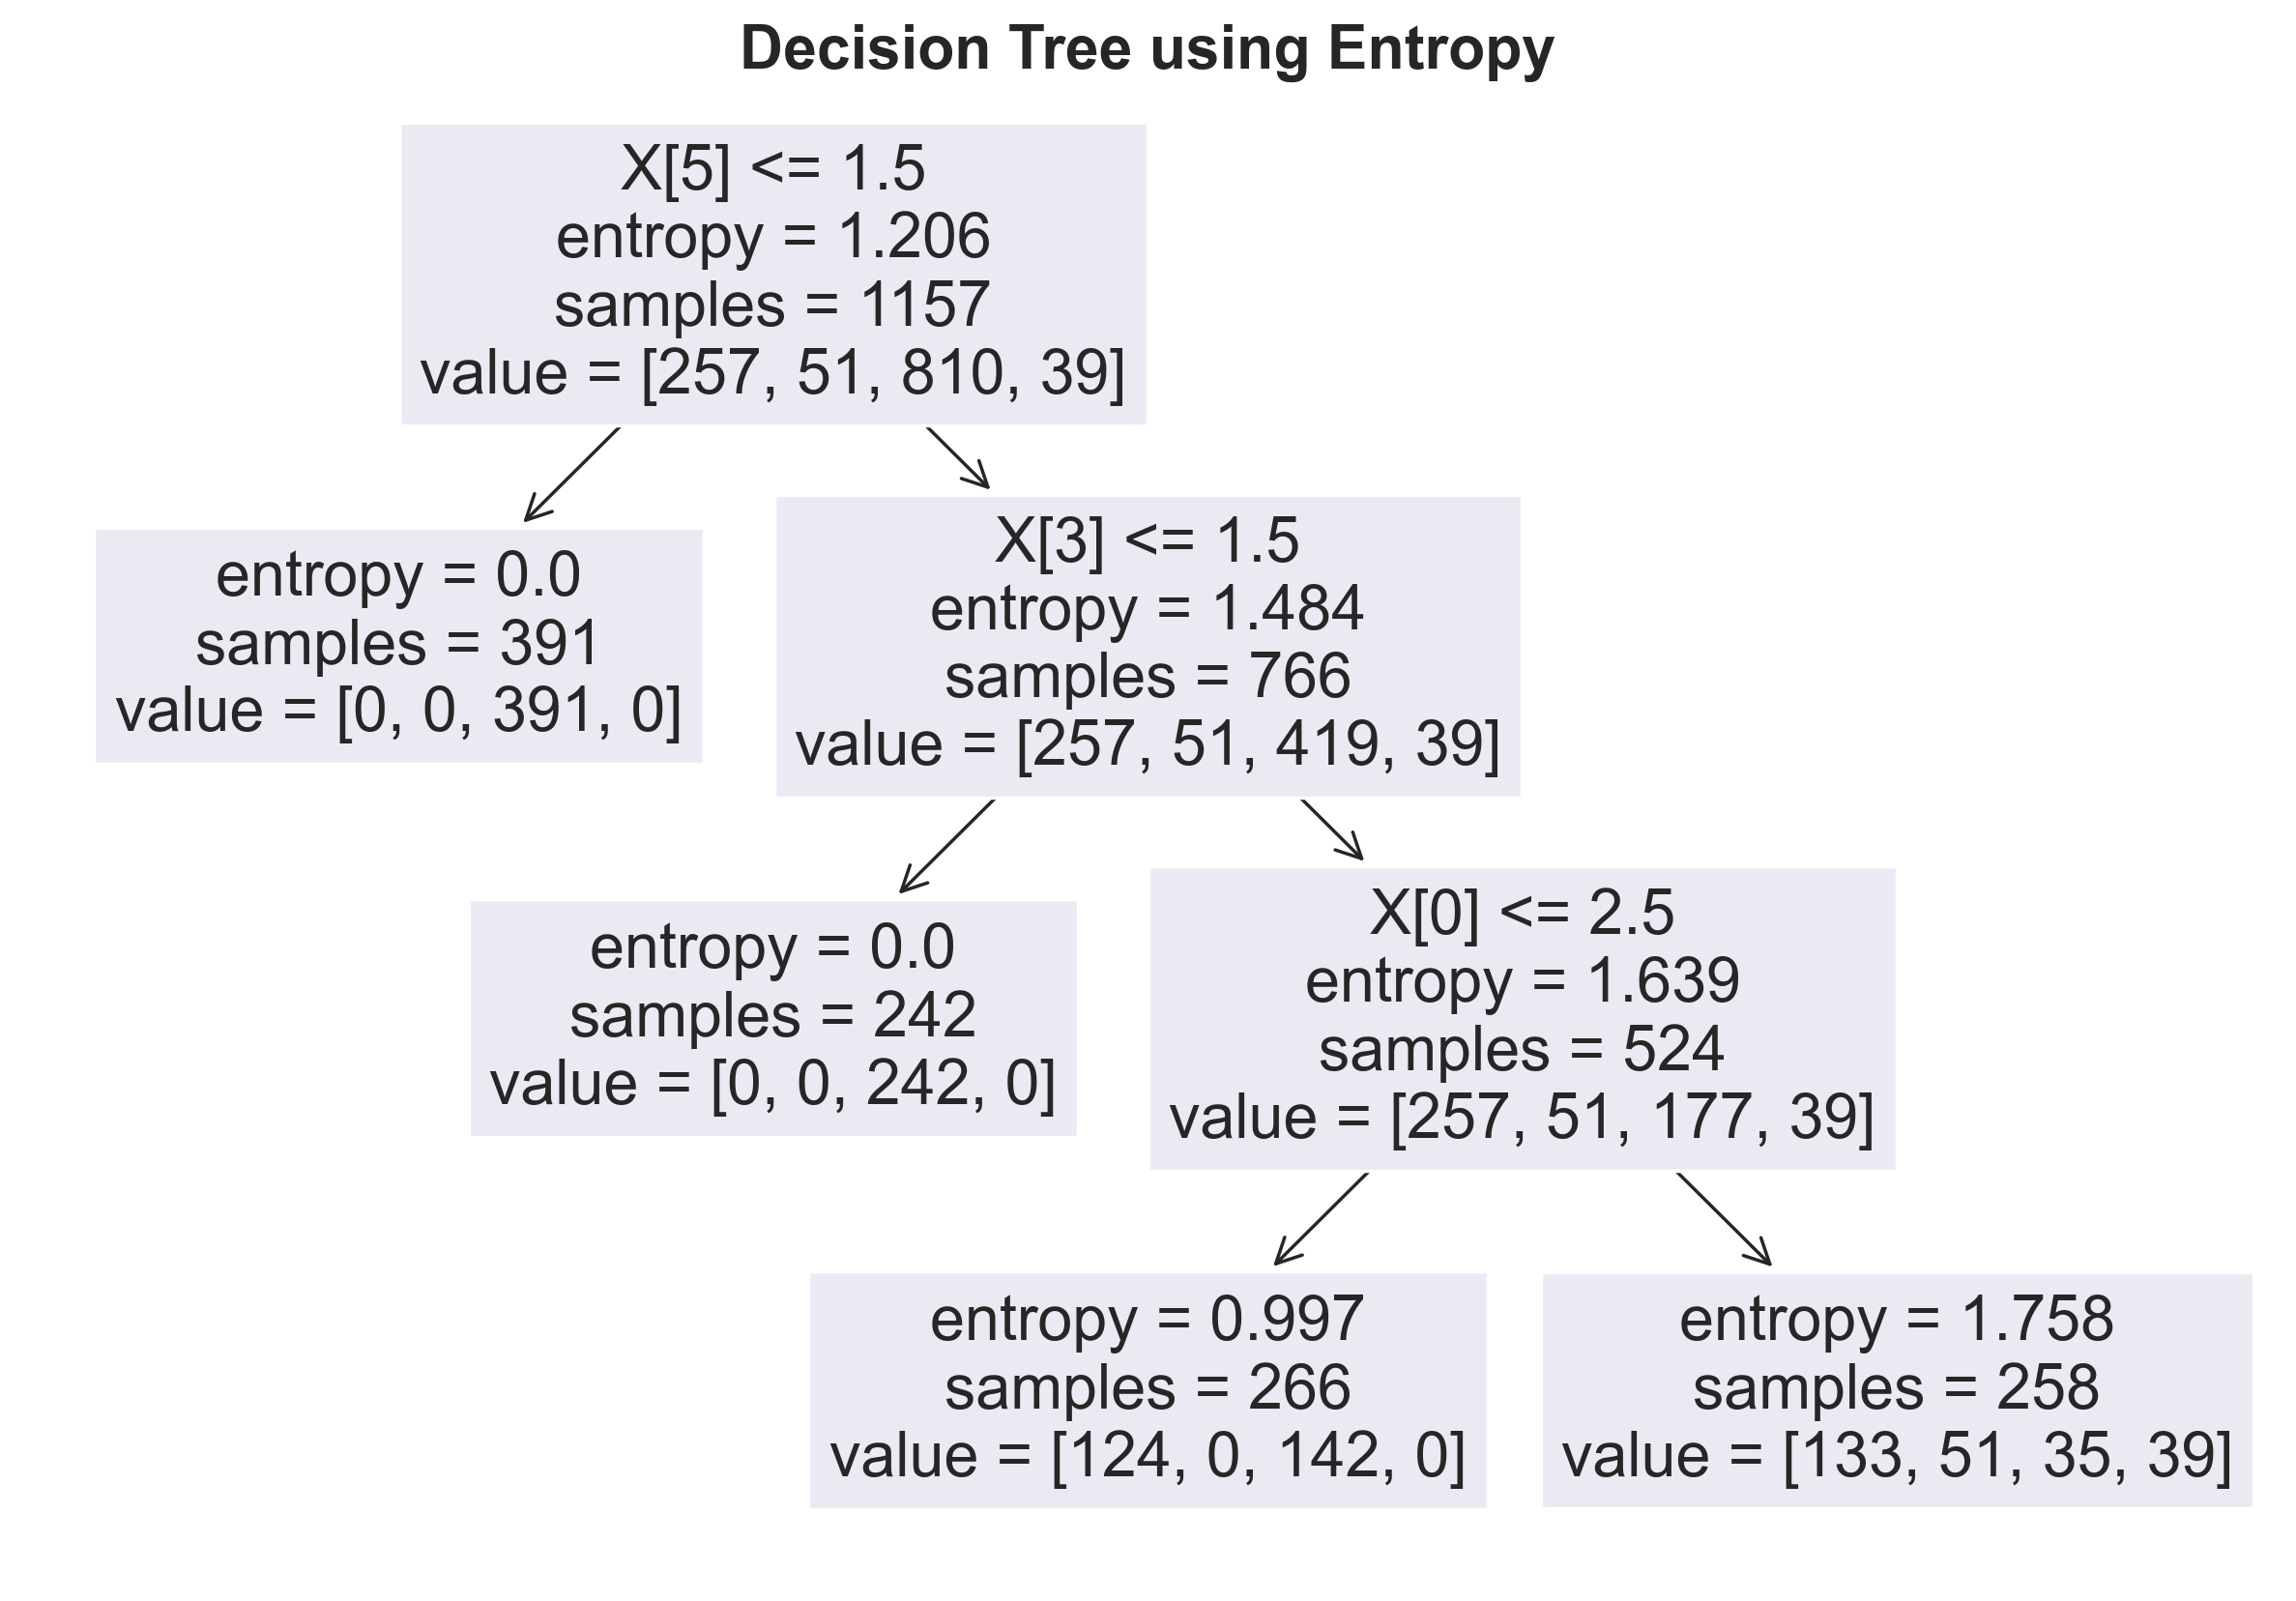

In [162]:
plt.figure(figsize=(12,8), dpi= 250)

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train)) 
plt.title("Decision Tree using Entropy", fontsize= 18, fontweight= 'bold')
plt.show()

#### Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

for DT with entropy criterion

In [171]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_en)

print('Confusion matrix using decision tree with entropy criterion\n\n', cm)

Confusion matrix using decision tree with entropy criterion

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


for DT with gini index criterion

In [170]:
cmg = confusion_matrix(Y_test, y_pred_gini)

print('Confusion matrix using decision tree with gini criterion\n\n', cmg)

Confusion matrix using decision tree with gini criterion

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


##### Classification Report

For DT with entropy

In [167]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT with gini

In [168]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\VS\env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
